### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px 

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [38]:
data = pd.read_csv('data/coupons.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [39]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [40]:

#Check To See Which Columns Have Null Values
print(data.isnull().sum())

#Is Apparent that Car, Bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20to50 columns have null values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
#Drop all the null values in columns:Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,and Restaurant20to50
clean_data = data.dropna(subset = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
clean_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [42]:
#Find out how many people chose to accept coupon 
people_accepted = clean_data['Y'].loc[clean_data['Y']==1].count()
total_people = clean_data['Y'].count()
print('People Who Chose To Accept Coupon =',people_accepted)
print("Total Amount of People Observed = ",total_people)
print('Proportion of People Who Chose To Accept Coupon =',people_accepted/total_people)

People Who Chose To Accept Coupon = 6877
Total Amount of People Observed =  12079
Proportion of People Who Chose To Accept Coupon = 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

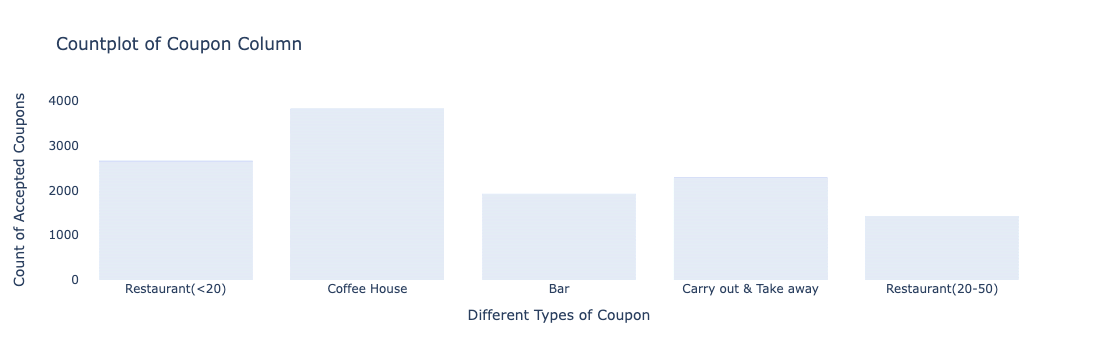

In [43]:
#Countplot to visualize coupon column
fig = px.bar(clean_data, x = 'coupon',title = "Countplot of Coupon Column",
             labels = {'coupon': 'Different Types of Coupon', 'count': 'Count of Accepted Coupons'}).update_layout(plot_bgcolor = 'rgba(0,0,0,0)')
fig


6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Count')

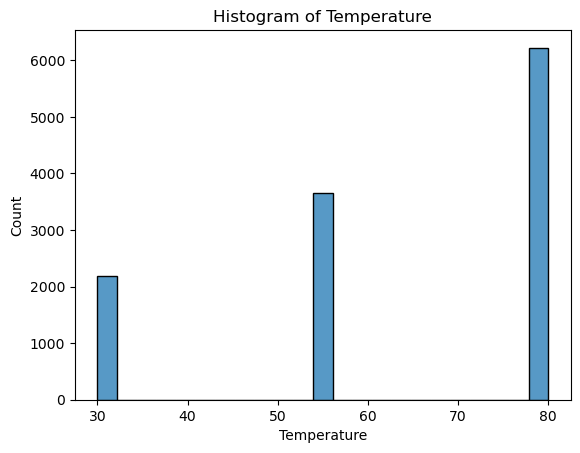

In [44]:
#Histogram to visualize temperature column
fig2 = sns.histplot(clean_data, x = 'temperature').set_title("Histogram of Temperature")
plt.xlabel('Temperature')
plt.ylabel('Count')




**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
bar_coupondata = clean_data.loc[data['coupon'].str.contains('Bar')]
bar_coupondata.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [46]:
# Code to determine what proportion of bar coupons were accepted
accepted = bar_coupondata['Y'].loc[bar_coupondata['Y']==1].count()
total= bar_coupondata['Y'].count()
print(accepted)
print(total)
print('People Who Chose To Accept Coupon =',accepted)
print("Total Amount of People Observed = ",total)
print('Proportion of People Who Chose To Accept Coupon =',accepted/total)
# From data can tell that less than half bar coupons were accepted.

788
1913
People Who Chose To Accept Coupon = 788
Total Amount of People Observed =  1913
Proportion of People Who Chose To Accept Coupon = 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [47]:

bar_data_greater = ['gt8','4~8']
total_bar_accepted = clean_data['Y'].count()

#Acceptance Rate for those who went to bar more than 3 times a month
bar_visit_greater = bar_coupondata.loc[bar_coupondata['Bar'].isin(bar_data_greater)]
bar_visit_greater_accpt = bar_visit_greater['Y'].loc[bar_visit_greater['Y']==1].count()
print('People Who Chose To Accept That Went To Bar More Than 3 Times =',bar_visit_greater_accpt)
print("Total Amount of People Observed = ",total_bar_accepted)
print('Acceptance Rate of People Who Chose To Accept Coupon & Went To Bar More Than 3 Times =',((bar_visit_greater_accpt/total_bar_accepted)*100))

#Acceptance Rate for those who went to bar 3 or fewer times
bar_data_less = ['never','less1','1~3']
bar_visit_less = bar_coupondata.loc[bar_coupondata['Bar'].isin(bar_data_less)]
bar_visit_less_accpt = bar_visit_less['Y'].loc[bar_visit_less['Y']==1].count()
print('People Who Chose To Accept That Went To Bar 3 or Less Times =',bar_visit_less_accpt)
print("Total Amount of People Observed = ",total_bar_accepted)
print('Acceptance Rate of People Who Chose To Accept Coupon & Went To Bar 3 or Less Times =',((bar_visit_less_accpt/total_bar_accepted)*100))

#From data can infer that people who went to the bar 3 or less times were more likely to accept coupons.

People Who Chose To Accept That Went To Bar More Than 3 Times = 147
Total Amount of People Observed =  12079
Acceptance Rate of People Who Chose To Accept Coupon & Went To Bar More Than 3 Times = 1.2169881612716285
People Who Chose To Accept That Went To Bar 3 or Less Times = 641
Total Amount of People Observed =  12079
Acceptance Rate of People Who Chose To Accept Coupon & Went To Bar 3 or Less Times = 5.306730689626625


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


### 

In [48]:
bar_data_drivers= ['1~3','4~8','gt8']
bar_data_drivers_younger = ['21','below21']
bar_data_drivers_older = ['26','31','36','41','46','50plus']
total_bar_accepted = clean_data['Y'].count()

#Acceptance rate for drivers who go to bar more than once a month and over the age of 25
driver_younger= bar_coupondata.loc[(bar_coupondata['Bar'].isin(bar_data_drivers)==False) & 
    (bar_coupondata['age'].isin(bar_data_drivers_younger))]
bar_younger_driver=driver_younger['Y'].loc[driver_younger['Y']==1].count()
print(bar_younger_driver)
print('Acceptance Rate of People Who Went To Bar Younger Than 25:',
      bar_younger_driver/total_bar_accepted*100,'%')

#Acceptance rate for drivers who go to bar older than 25
driver_older= bar_coupondata.loc[bar_coupondata['Bar'].isin(bar_data_drivers) & 
    (bar_coupondata['age'].isin(bar_data_drivers_older))]
bar_older_driver=driver_older['Y'].loc[driver_older['Y']==1].count()
print(bar_older_driver)
print('Acceptance Rate of People That Go to Bar More Than Once a Month & Older Than 25:',
     bar_older_driver/total_bar_accepted*100,'%')


#From data can infer that people who went to bar more than once a month and are older than 25 tend to accept coupons more that any other group who also went to bar.


120
Acceptance Rate of People Who Went To Bar Younger Than 25: 0.9934597234870436 %
278
Acceptance Rate of People That Go to Bar More Than Once a Month & Older Than 25: 2.301515026078318 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [49]:
bar_data_drivers= ['1~3','4~8','gt8']
bar_passenger = ['Kid(s)']
bar_occupation = ['Farming Fishing & Forestry']
#total= bar_coupondata['Y'].count()
total_bar_accepted = clean_data['Y'].count()
#print(total_bar_accepted)

#Acceptance rate of drivers that go to bars more than once a month and had passengers that are not kids and also had occupations that were not farming, fishing, or forestry.
bar_no_kid_no_fff= bar_coupondata.loc[(bar_coupondata['Bar'].isin(bar_data_drivers)) & 
    (bar_coupondata['passanger'].isin(bar_passenger)==False) & 
    (bar_coupondata['occupation'].isin(bar_occupation)==False)]
ans5_1 = bar_no_kid_no_fff['Y'].loc[bar_no_kid_no_fff['Y']==1].count()
print(ans5_1)
Acceptance_Rate_5_1 = 'Acceptance Rate of Drivers Who Go To Bars More Than Once a Month, Have No Kids as Passengers, and Not Farmers, Fishermen, or in Forestry =',ans5_1/total_bar_accepted*100,'%' 
print(Acceptance_Rate_5_1)






376
('Acceptance Rate of Drivers Who Go To Bars More Than Once a Month, Have No Kids as Passengers, and Not Farmers, Fishermen, or in Forestry =', 3.11284046692607, '%')


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [50]:
#How to find acceptance rate of people that go to bars more than once a month and are under the age of 30.

bar_data_drivers= ['1~3','4~8','gt8']
bar_younger_than_30 = ['26','21','below21']
total_bar_accepted = clean_data['Y'].count()

driver_younger_than_30= bar_coupondata.loc[bar_coupondata['Bar'].isin(bar_data_drivers) & 
    (bar_coupondata['age'].isin(bar_younger_than_30))]
bar_driver_than_younger_30=driver_younger_than_30['Y'].loc[driver_younger_than_30['Y']==1].count()
print(bar_driver_than_younger_30)
Acceptance_Rate_Prb_6 = bar_driver_than_younger_30/total_bar_accepted*100,'%'
print('Acceptance rate of people who go to bars more than once a month and are under the age of 30:',Acceptance_Rate_Prb_6)

236
Acceptance rate of people who go to bars more than once a month and are under the age of 30: (1.9538041228578522, '%')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesize that if drivers are older than 25 they are more likely to accept bar coupon and if they go to bar less than 3 
times a month then they are more likely to accept coupons because these two factors yielded higher acceptance rates. 




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [51]:
#Have coupondata just for carry out.
co_coupondata = clean_data.loc[data['coupon'].str.contains('Carry out')]
co_coupondata.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


In [66]:
#How Many People that Went For Carry Out/Take-Out Accepted Coupons 
accepted = co_coupondata['Y'].loc[co_coupondata['Y']==1].count()
co_total= co_coupondata['Y'].count()
print('People That Went For Carry Out/Take-Out That Accepted Coupons',accepted)
print('Total People That Went For Carry Out/Take-Out That Accepted Coupons',co_total)
print('Percentage of People Who Went For Carry Out/Take-Out That Accepted Coupon:',accepted/total*100,'%')

#From data it is evident that about 88% of people that went for Carry Out accepted coupons.

People That Went For Carry Out/Take-Out That Accepted Coupons 1682
Total People That Went For Carry Out/Take-Out That Accepted Coupons 2280
Percentage of People Who Went For Carry Out/Take-Out That Accepted Coupon: 87.9247255619446 %


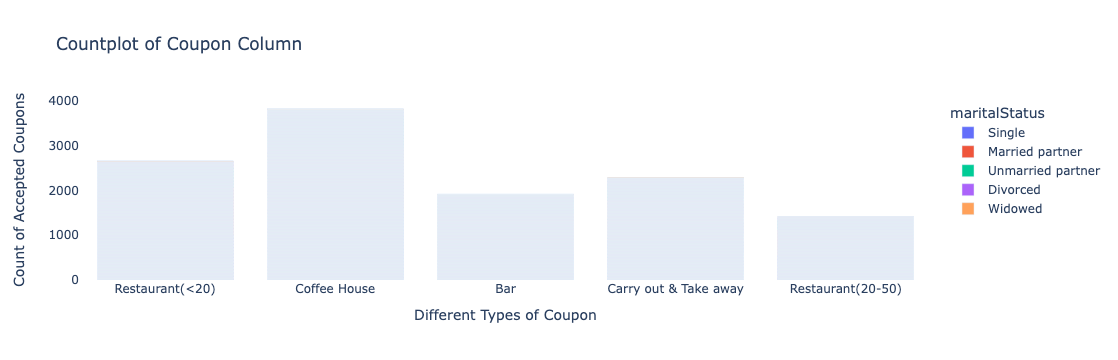

In [53]:
#Graph to help visualize investigation on carry out coupon data with color set to marital status.
fig = px.bar(clean_data, x = 'coupon',color = 'maritalStatus',title = "Countplot of Coupon Column",
             labels = {'coupon': 'Different Types of Coupon', 'count': 'Count of Accepted Coupons'}).update_layout(plot_bgcolor = 'rgba(0,0,0,0)')
fig

In [54]:
#How Many People Accepted Coupons For Take-Out That were in relationships
#Total Number of People Observed
co_in_relationship = ['Unmarried partner','Married partner']
#co_total= co_coupondata['Y'].count()
total_co_total = clean_data['Y'].count()

#Coupon Acceptance Rate of People that Go to Carry Out and Are in Relationships
co_driver_in_relationship = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)]
co_driver_in_relationship_accpt = co_driver_in_relationship['Y'].loc[co_driver_in_relationship['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out & Take-Out While Also Being In a Relationship:',co_driver_in_relationship_accpt)
print('Acceptance Rate of People That Went for Take Out & Are In Relationship That Accepted Coupon:',(co_driver_in_relationship_accpt/total_co_total)*100,'%')

#Coupon Acceptance Rate of People that Go to Carry Out and Are Not in Relationships
co_driver_not_in_relationship = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)==False]
co_driver_not_in_relationship_accpt = co_driver_not_in_relationship['Y'].loc[co_driver_not_in_relationship['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out & Take-Out While Also Not Being In a Relationship:',co_driver_not_in_relationship_accpt)
print('Acceptance Rate of People That Went for Take Out & Are In Relationship That Accepted Coupon:',co_driver_not_in_relationship_accpt/total_co_total*100,'%')

#From data can infer that people who go for Carry Out while being in a relationship tend to accept coupon more than people who are not in relationships.


How many People Accepted Coupons that go for Carry Out & Take-Out While Also Being In a Relationship: 910
Acceptance Rate of People That Went for Take Out & Are In Relationship That Accepted Coupon: 7.533736236443414 %
How many People Accepted Coupons that go for Carry Out & Take-Out While Also Not Being In a Relationship: 772
Acceptance Rate of People That Went for Take Out & Are In Relationship That Accepted Coupon: 6.391257554433313 %


In [55]:
co_in_relationship = ['Unmarried partner','Married partner']
co_children = [1]
total_co_total = clean_data['Y'].count()

# Acceptance Rate With People Who Went For Carry-Out That Are in Relationships With Children
co_driver_in_relationship_with_kids = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)& 
    (co_coupondata['has_children'].isin(co_children))]
co_driver_in_relationship_with_kids_accept = co_driver_in_relationship_with_kids['Y'].loc[co_driver_in_relationship_with_kids['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, & Having a Kid:',co_driver_in_relationship_with_kids_accept)
print('Acceptance Rate of People That Went for Take Out, Are In Relationship, & Have a Kid That Accepted Coupon:',(co_driver_in_relationship_with_kids_accept/total_co_total)*100,'%')

# Acceptance Rate With People Who Went For Carry-Out That Are in Relationships Without Children
co_driver_in_relationship_without_kids = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)& 
    (co_coupondata['has_children'].isin(co_children)==False)]
co_driver_in_relationship_without_kids_accept = co_driver_in_relationship_without_kids['Y'].loc[co_driver_in_relationship_without_kids['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, & Not Having a Kid:',co_driver_in_relationship_without_kids_accept)
print('Acceptance Rate of People That Went for Take Out, Are In Relationship, & Dont Have a Kid That Accepted Coupon:',(co_driver_in_relationship_without_kids_accept/total_co_total)*100,'%')

#From data can infer that people who are in a relationship and have a kid tend to accept coupon more than people who are in a relationship and dont have kids.

How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, & Having a Kid: 541
Acceptance Rate of People That Went for Take Out, Are In Relationship, & Have a Kid That Accepted Coupon: 4.478847586720755 %
How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, & Not Having a Kid: 369
Acceptance Rate of People That Went for Take Out, Are In Relationship, & Dont Have a Kid That Accepted Coupon: 3.054888649722659 %


In [56]:
co_in_relationship = ['Unmarried partner','Married partner']
co_children = [1]
co_4ngt = ['4~8','gt8']

#Acceptance Rate of People Who Went For Carry Out 4 or More Times That Are In Relationships and Have a Child 
co_driver_in_relationship_with_kids_ngt4 = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)& 
    (co_coupondata['has_children'].isin(co_children)) &  (co_coupondata['CarryAway'].isin(co_4ngt))]
co_driver_in_relationship_with_kids_ngt4_accept = co_driver_in_relationship_with_kids_ngt4['Y'].loc[co_driver_in_relationship_with_kids_ngt4['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, Having a Kid, and going 4 or More Times:',co_driver_in_relationship_with_kids_ngt4_accept)
print('Acceptance Rate of People That Went for Take Out, Are In Relationship, Have a Kid, and went 4 or More Times a Month That Accepted Coupon:',(co_driver_in_relationship_with_kids_ngt4_accept/total_co_total)*100,'%')

#Acceptance Rate of People Who Went For Carry Out Less Than 4 Times That Are In Relationships and Have a Child 
co_driver_in_relationship_with_kids_lt4 = co_coupondata.loc[co_coupondata['maritalStatus'].isin(co_in_relationship)& 
    (co_coupondata['has_children'].isin(co_children)) &  (co_coupondata['CarryAway'].isin(co_4ngt)==False)]
co_driver_in_relationship_with_kids_lt4_accept = co_driver_in_relationship_with_kids_lt4['Y'].loc[co_driver_in_relationship_with_kids_lt4['Y']==1].count()
print('How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, Having a Kid, and going 4 or More Times:',co_driver_in_relationship_with_kids_lt4_accept)
print('Acceptance Rate of People That Went for Take Out, Are In Relationship, Have a Kid, and went 4 or More Times a Month That Accepted Coupon:',(co_driver_in_relationship_with_kids_lt4_accept/total_co_total)*100,'%')

#From data can infer that people who are in a relationship have kids and get Carry Out 4 or more times a month have a higher chance of accepting coupons than same group of people that go less than 4 times a month. 

How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, Having a Kid, and going 4 or More Times: 258
Acceptance Rate of People That Went for Take Out, Are In Relationship, Have a Kid, and went 4 or More Times a Month That Accepted Coupon: 2.1359384054971438 %
How many People Accepted Coupons that go for Carry Out/Take-Out While Also Being In a Relationship, Having a Kid, and going 4 or More Times: 283
Acceptance Rate of People That Went for Take Out, Are In Relationship, Have a Kid, and went 4 or More Times a Month That Accepted Coupon: 2.342909181223611 %


Findings from investigation

- From data it is evident that about 88% of people that went for Carry Out accepted coupons.
- From data can infer that people who go for Carry Out while being in a relationship tend to accept coupon more than people who are not in relationships.
- From data can infer that people who are in a relationship and have a kid tend to accept coupon more than people who are in a relationship and dont have kids.
- From data can infer that people who are in a relationship have kids and get Carry Out 4 or more times a month have a higher chance of accepting coupons than same group of people that go less than 4 times a month. 

Future Steps: 
- Find out data about drivers that go to different locations where coupons are accepted and analyze coupon data for those locations. 
- Analyze data regarding people who refuse coupons and see if there is anything in common with the people who refuse coupons.
- Analyze if income has any impact on coupons being accepted or rejected.